# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [2]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3872 non-null   datetime64[ns]
 1   Open            3872 non-null   float64       
 2   High            3872 non-null   float64       
 3   Low             3872 non-null   float64       
 4   Close           3872 non-null   float64       
 5   Volume          3872 non-null   int64         
 6   Dividends       3872 non-null   float64       
 7   Stock Splits    3872 non-null   float64       
 8   Year            3872 non-null   int64         
 9   Converted Date  3872 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 302.6 KB


In [4]:
stocks_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583,2013.583936,735265.486054
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706,4.454620,1622.149194
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000,2006.000000,732456.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000,2010.000000,733861.750000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000,2014.000000,735267.500000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000,2017.000000,736668.250000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000,2021.000000,738074.000000


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

C:\Users\snigd\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


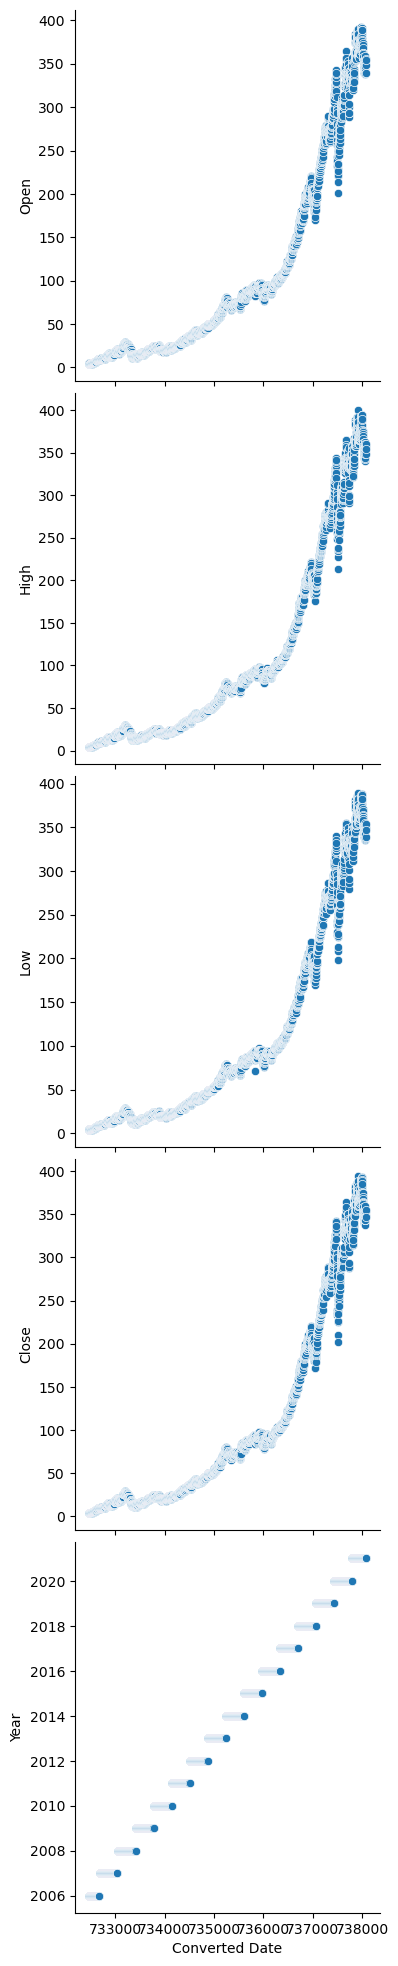

In [6]:
sb.pairplot(stocks_df, y_vars=['Open', 'High', 'Low', 'Close', 'Year'],
                x_vars='Converted Date', size=4,aspect=1, kind='scatter')
plt.show()

C:\Users\snigd\AppData\Local\Temp\ipykernel_6988\4281156881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stocks_df.corr()


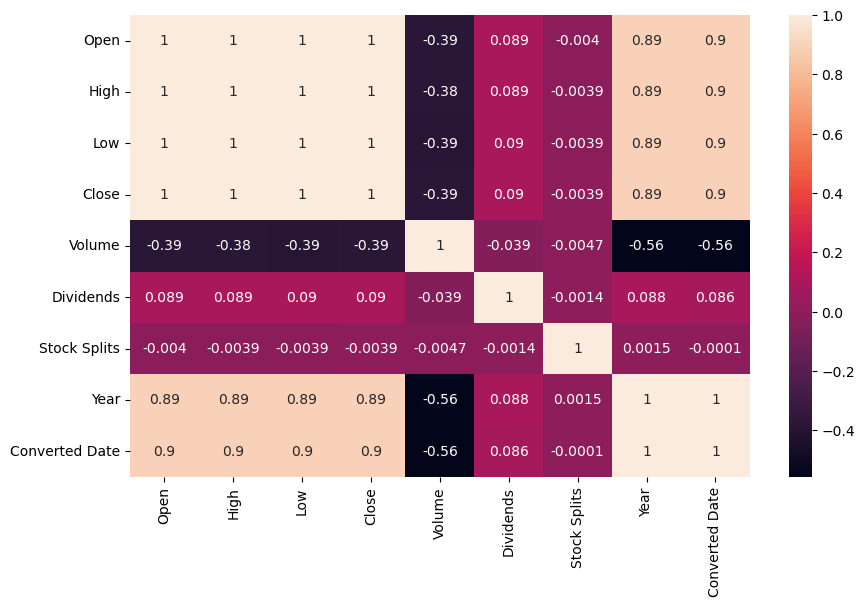

In [7]:
corr = stocks_df.corr()
sb.heatmap(corr, annot=True).figure.set_size_inches(10, 6)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [8]:
X=stocks_df['Converted Date']
y=stocks_df['High']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [10]:
X_test.head()

2424    735975
2643    736290
2501    736087
2044    735424
288     732876
Name: Converted Date, dtype: int64

In [11]:
X_train.head()

2457    736024
1540    734690
384     733014
2560    736172
3320    737276
Name: Converted Date, dtype: int64

In [12]:
y_test.head()

2424     88.737804
2643    103.133735
2501     94.404614
2044     72.593710
288      16.118450
Name: High, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [13]:
y_train.head()

2457     87.057136
1540     42.189558
384      18.792144
2560     91.465715
3320    259.651178
Name: High, dtype: float64

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

In [14]:
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params

const            -43877.994313
Converted Date        0.059821
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   High   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 1.127e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:12:37   Log-Likelihood:                -14327.
No. Observations:                2710   AIC:                         2.866e+04
Df Residuals:                    2708   BIC:                         2.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.388e+04    414.428   -105.876      0.000   -4.47e+04   -4.31e+04
Converted Date     0.0598      0.001    106.137      0.000       0.059       0.061
==============================================================================
Omnibus:                      301.204   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.838
Skew:                           0.516   Prob(JB):                     2.68e-41
Kurtosis:                       2.233   Cond. No.                     3.31e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

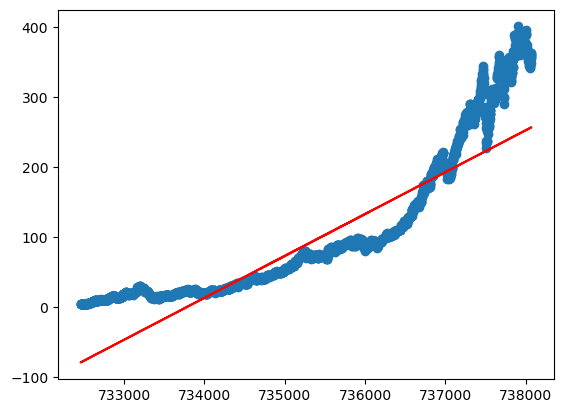

In [17]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -4.388e+04 + 0.0598*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

C:\Users\snigd\AppData\Local\Temp\ipykernel_6988\4203335064.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(res, bins = 15)


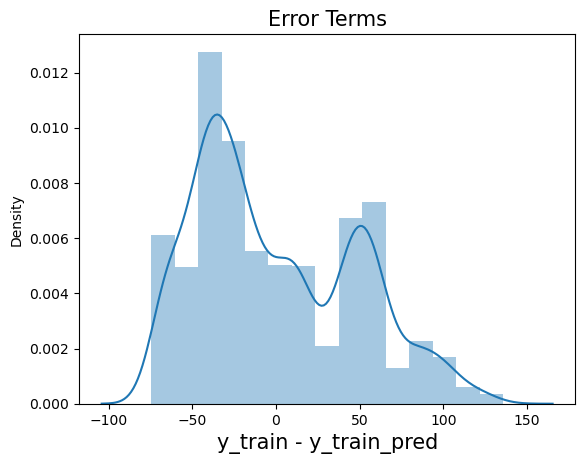

In [16]:
#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Now plot the residuals. Did you get a bell curve? Yes

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold? Yes, my R-squared is above 0.8.
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares?Yes